In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
df = pd.read_excel('Global Superstore.xlsx')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")
df['Sales'] = df['Sales'].fillna(df['Sales'].median())
df['Profit'] = df['Profit'].fillna(df['Profit'].median())
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

Missing values:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [4]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [6]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
df = remove_outliers(df, 'Sales')
df = remove_outliers(df, 'Profit')
print("done")


done


In [7]:
summary_stats = df.describe()
print(f"Summary Statistics:\n{summary_stats}")
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
std_sales = df['Sales'].std()
mean_profit = df['Profit'].mean()
median_profit = df['Profit'].median()
std_profit = df['Profit'].std()
print(f"Sales Mean: {mean_sales}, Median: {median_sales}, Std Dev: {std_sales}")
print(f"Profit Mean: {mean_profit}, Median: {median_profit}, Std Dev: {std_profit}")

Summary Statistics:
             Row ID                     Order Date  \
count  31737.000000                          31737   
mean   26128.704257  2013-05-13 20:48:12.522922752   
min        1.000000            2011-01-01 00:00:00   
25%    12628.000000            2012-06-20 00:00:00   
50%    26888.000000            2013-07-13 00:00:00   
75%    39280.000000            2014-05-23 00:00:00   
max    51290.000000            2014-12-31 00:00:00   
std    15091.029331                            NaN   

                           Ship Date   Postal Code         Sales  \
count                          31737   6881.000000  31737.000000   
mean   2013-05-17 20:06:44.272615424  55503.377852     59.329160   
min              2011-01-03 00:00:00   1453.000000      0.444000   
25%              2012-06-24 00:00:00  23223.000000     19.440000   
50%              2013-07-17 00:00:00  59715.000000     42.400000   
75%              2014-05-27 00:00:00  90008.000000     83.920000   
max              

Correlation Matrix:
                 Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.019495 -0.133589 -0.191686  0.065411 -0.045048   
Postal Code    0.019495     1.000000  0.037295  0.023565  0.040305 -0.017216   
Sales         -0.133589     0.037295  1.000000  0.262746 -0.220778  0.445434   
Quantity      -0.191686     0.023565  0.262746  1.000000 -0.024324  0.162212   
Discount       0.065411     0.040305 -0.220778 -0.024324  1.000000 -0.578383   
Profit        -0.045048    -0.017216  0.445434  0.162212 -0.578383  1.000000   
Shipping Cost -0.097117     0.026002  0.721462  0.180159 -0.159160  0.319439   

               Shipping Cost  
Row ID             -0.097117  
Postal Code         0.026002  
Sales               0.721462  
Quantity            0.180159  
Discount           -0.159160  
Profit              0.319439  
Shipping Cost       1.000000  


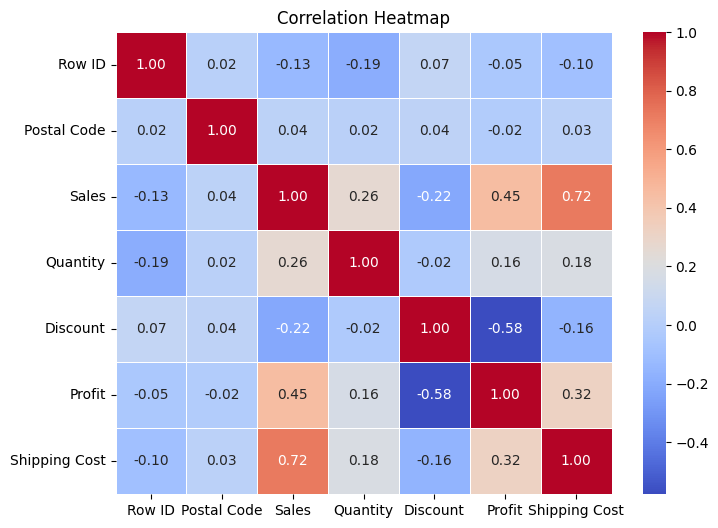

In [12]:
correlation_matrix = df.drop(columns=['Order ID', 'Customer ID', 'Order Date', 'Ship Date', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Order Priority', 'Ship Mode']).corr()
print(f"Correlation Matrix:\n{correlation_matrix}")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

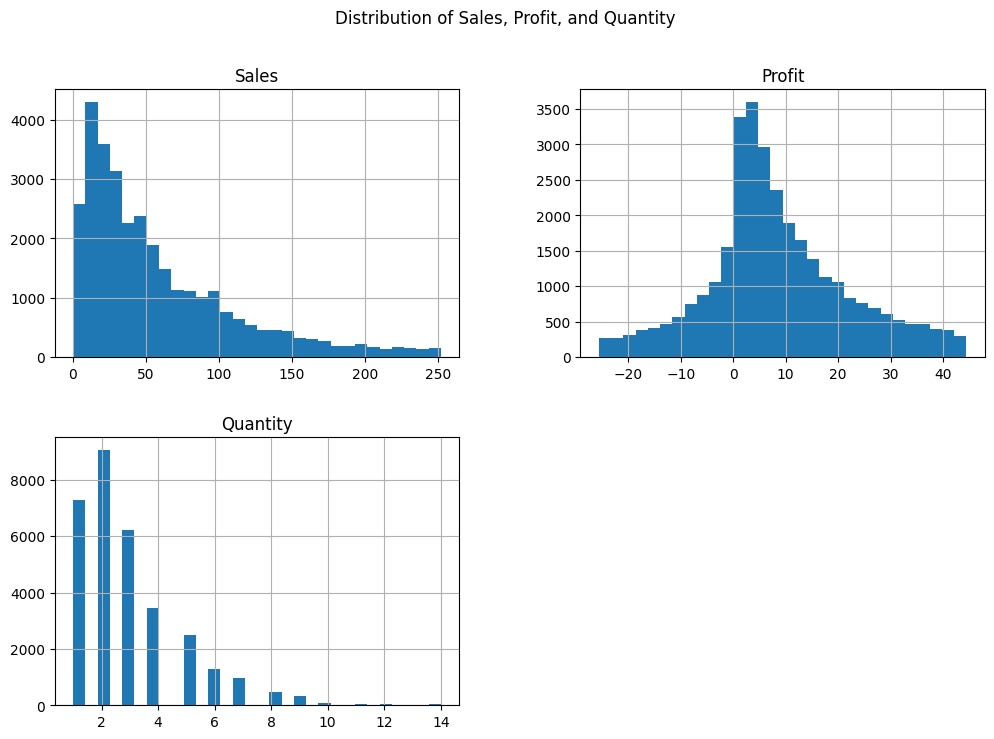

In [13]:
df[['Sales', 'Profit', 'Quantity']].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribution of Sales, Profit, and Quantity')
plt.show()

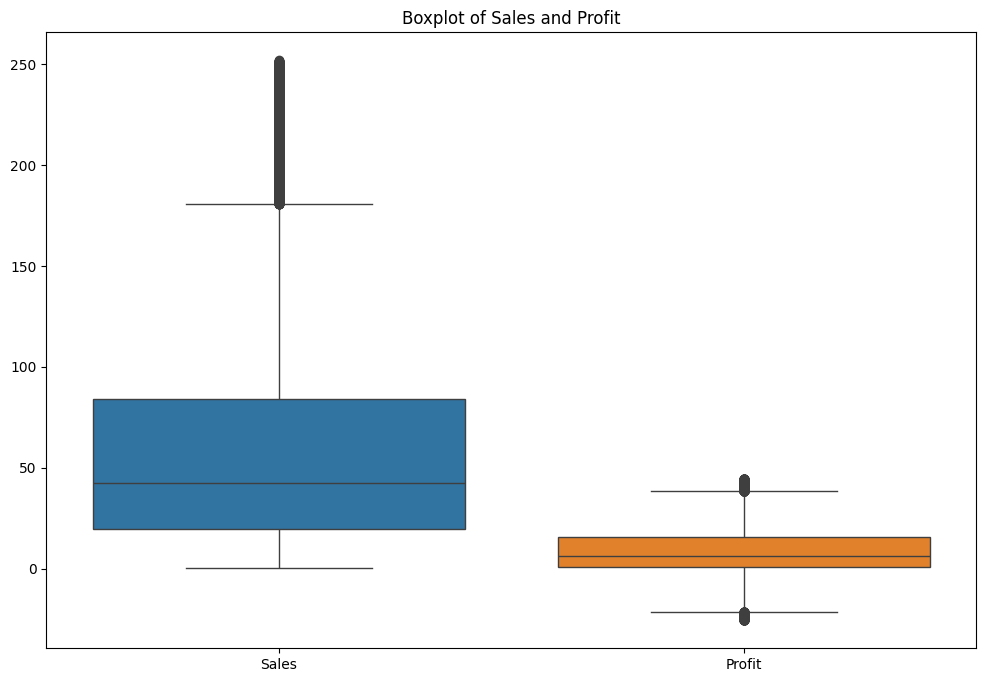

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Sales', 'Profit']])
plt.title('Boxplot of Sales and Profit')
plt.show()

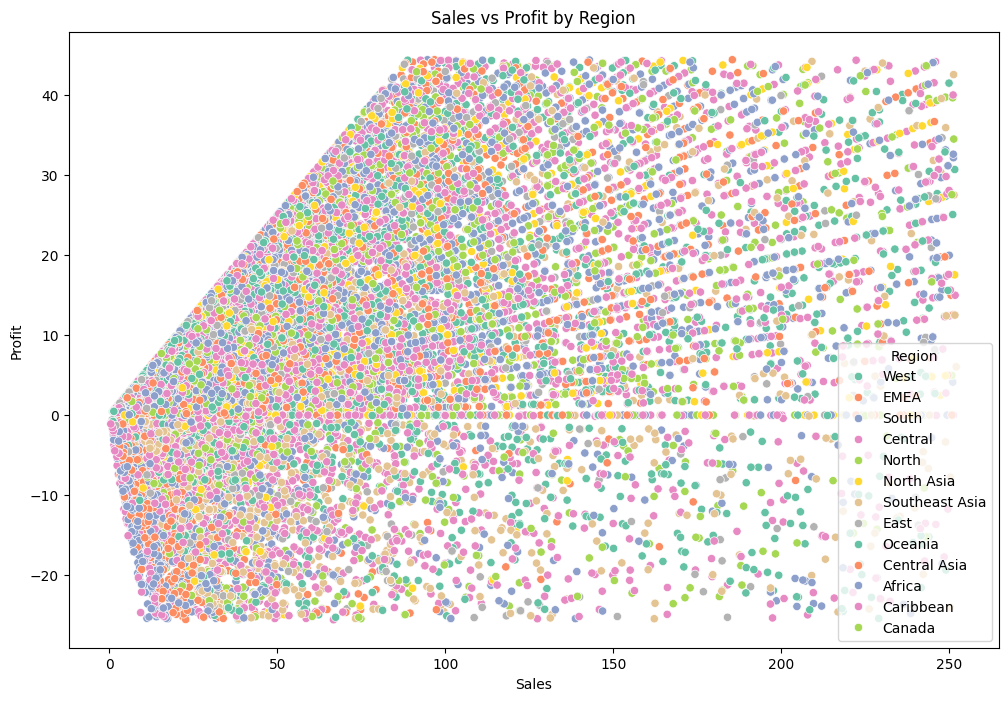

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Region', palette='Set2')
plt.title('Sales vs Profit by Region')
plt.show()


**TASK 2**

Shape of the dataset: (2823, 24)
Data types:
 ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
dtype: object
Missing values:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
P

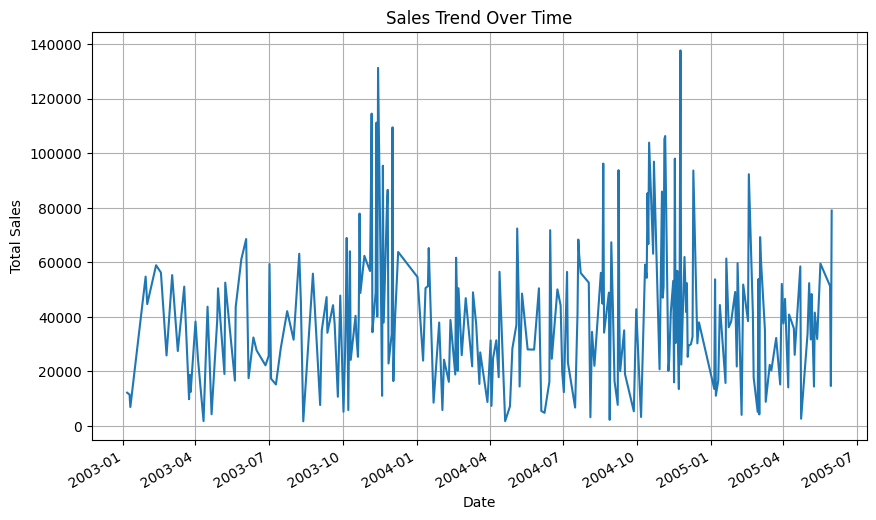

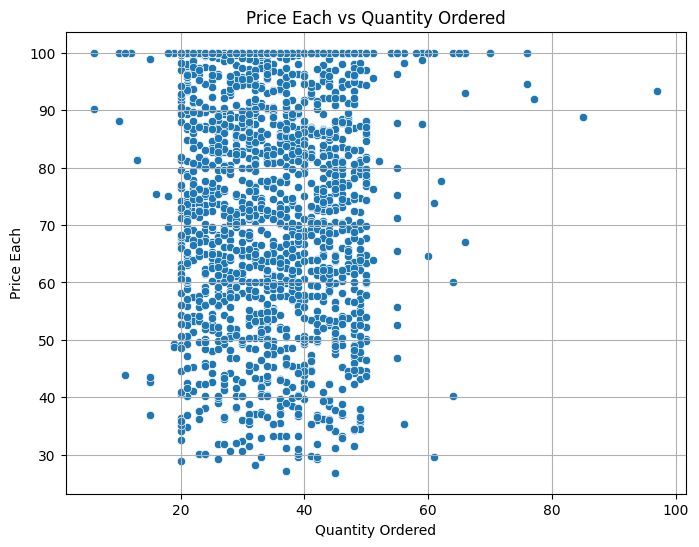

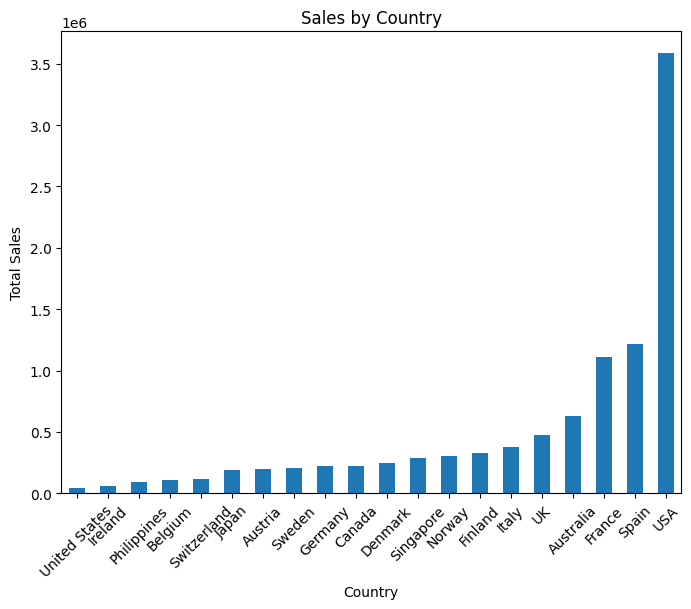

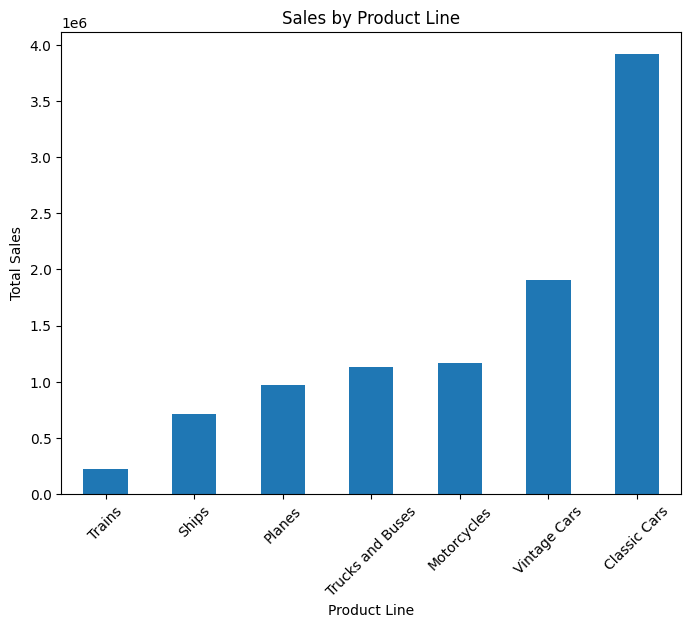

Mean Squared Error: 1359458.798206087
R-squared: 0.6885468480396755
Model Coefficients:
Price Each Coefficient: 59.36412106965867
Quantity Ordered Coefficient: 100.75935548901808

Recommendations:
Increasing Price Each positively impacts Sales. Focus on high-margin products.
Increasing Quantity Ordered positively impacts Sales. However, be mindful of profit margins.

Top performing country: USA
Top performing product line: Classic Cars


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
url = "https://raw.githubusercontent.com/cwarden/kettle/master/samples/transformations/files/sales_data.csv"
df = pd.read_csv(url, encoding='latin1')
print("Shape of the dataset:", df.shape)
print("Data types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())
print("First few rows of the dataset:\n", df.head())
df = df.drop_duplicates()
df['PRICEEACH'] = df['PRICEEACH'].fillna(df['PRICEEACH'].median())
df['SALES'] = df['SALES'].fillna(df['SALES'].median())
df['QUANTITYORDERED'] = df['QUANTITYORDERED'].fillna(df['QUANTITYORDERED'].median())
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
plt.figure(figsize=(10, 6))
df.groupby('ORDERDATE')['SALES'].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='QUANTITYORDERED', y='PRICEEACH', data=df)
plt.title("Price Each vs Quantity Ordered")
plt.xlabel("Quantity Ordered")
plt.ylabel("Price Each")
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
df.groupby('COUNTRY')['SALES'].sum().sort_values().plot(kind='bar')
plt.title("Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
df.groupby('PRODUCTLINE')['SALES'].sum().sort_values().plot(kind='bar')
plt.title("Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

X = df[['PRICEEACH', 'QUANTITYORDERED']]
y = df['SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print("Model Coefficients:")
print(f"Price Each Coefficient: {model.coef_[0]}")
print(f"Quantity Ordered Coefficient: {model.coef_[1]}")

print("\nRecommendations:")
if model.coef_[0] > 0:
    print("Increasing Price Each positively impacts Sales. Focus on high-margin products.")
else:
    print("Increasing Price Each may not significantly boost Sales. Consider other strategies.")

if model.coef_[1] > 0:
    print("Increasing Quantity Ordered positively impacts Sales. However, be mindful of profit margins.")
else:
    print("Increasing Quantity Ordered doesn't seem to significantly increase Sales. Re-evaluate discount strategies.")

best_country = df.groupby('COUNTRY')['SALES'].sum().idxmax()
best_productline = df.groupby('PRODUCTLINE')['SALES'].sum().idxmax()

print(f"\nTop performing country: {best_country}")
print(f"Top performing product line: {best_productline}")